# Comparação entre Heurísticas
------------
**Aluna:** Gabriela Mitu

### Comparação dos números de filmes assistidos nas maratonas

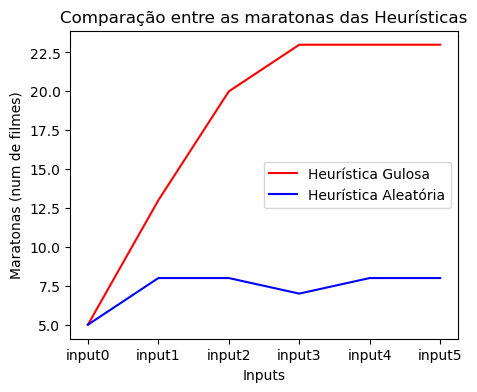

In [14]:

import numpy as np
import matplotlib.pyplot as plt


#INPUTS
inputs = ["input0", "input1", "input2", "input3", "input4", "input5"]

# QUANTIDADE DE FILMES NA MARATONA
# Obs.: Resultados obtidos pelos executáveis
maratonaGulosa = [5, 13, 20, 23, 23, 23]
maratonaAleatoria = [5, 8, 8, 7, 8, 8]


plt.figure(figsize=(5,4))
plt.plot(inputs, maratonaGulosa, color='red', label = "Heurística Gulosa")
plt.plot(inputs, maratonaAleatoria, color='blue', label = "Heurística Aleatória")
plt.xlabel("Inputs")
plt.ylabel("Maratonas (num de filmes)")
plt.title("Comparação entre as maratonas das Heurísticas")
plt.legend()
plt.show()

### Tempo de execução em função do aumento de filmes e de categorias

In [5]:
import subprocess
import time

def roda_com_entrada(executavel, arquivo_in):
  with open(arquivo_in) as f:
    start = time.perf_counter()
    proc = subprocess.run([executavel], input=f.read(), text=True, capture_output=True)
    end = time.perf_counter()

    stdout = proc.stdout
    

    tempo = end - start
    return (stdout, end - start)

In [13]:
## Arquivos de input
arqs = [f'inputs/input{i}.txt' for i in range(6)]

## ----- Heurística Gulosa -----

temposGulosa = [roda_com_entrada('./gulosa', arq)[1] for arq in arqs]
print("Tempos de execução da Heurística Gulosa em cada input: ")
print(temposGulosa)
print("-"*30)

## ----- Heurística Aleatória -----

temposAleatoria = [roda_com_entrada('./aleatorizacao', arq)[1] for arq in arqs]
print("Tempos de execução da Heurística Aleatorizada em cada input: ")
print(temposAleatoria)


Tempos de execução da Heurística Gulosa em cada input: 
[0.003443755999796849, 0.0027317139997649065, 0.002737624000019423, 0.003093758999966667, 0.006237279000288254, 0.009131054000135919]
------------------------------
Tempos de execução da Heurística Aleatorizada em cada input: 
[0.0029537810000874742, 0.0038958379996074655, 0.003617170999859809, 0.003409409999676427, 0.005484305000209133, 0.009196618999794737]


In [ ]:
#INPUTS
inputs = ["input0", "input1", "input2", "input3", "input4", "input5"]

# TEMPO GASTO EM CADA HEURÍSTICA
# Obs.: Resultados obtidos pelos executáveis
maratonaGulosa = [5, 13, 20, 23, 23, 23]
maratonaAleatoria = [5, 8, 8, 7, 8, 8]


plt.figure(figsize=(5,4))
plt.plot(inputs, maratonaGulosa, color='red', label = "Heurística Gulosa")
plt.plot(inputs, maratonaAleatoria, color='blue', label = "Heurística Aleatória")
plt.xlabel("Inputs")
plt.ylabel("Maratonas (num de filmes)")
plt.title("Comparação entre as maratonas das Heurísticas")
plt.legend()
plt.show()

### Tempo de tela

Aproveitamento da maratona em relação ao dia, ou seja, se foram bem ocupadas as 24h do dia assistindo filmes, considerando o input5.

In [3]:
# ------ Horas totais -----
dia = 23

## ----- Heurística Gulosa -----
duracaoT = 23
aproveitamentoG = duracaoT/dia
print(f"Tempo de Tela da Heurística Gulosa: {aproveitamentoG*100}%")

## ----- Heurística Aleatória -----
duracaoT = 8
aproveitamentoA = duracaoT/dia
print(f"Tempo de Tela da Heurística Aleatória: {aproveitamentoA*100}%")

Tempo de Tela da Heurística Gulosa: 100.0%
Tempo de Tela da Heurística Aleatória: 34.78260869565217%
